In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('C:/Users/SWH/Desktop/Python/data/store_201906_01.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   지점명        75524 non-null   object 
 3   상권업종대분류코드  565016 non-null  object 
 4   상권업종대분류명   565016 non-null  object 
 5   상권업종중분류코드  565016 non-null  object 
 6   상권업종중분류명   565016 non-null  object 
 7   상권업종소분류코드  565016 non-null  object 
 8   상권업종소분류명   565016 non-null  object 
 9   표준산업분류코드   532064 non-null  object 
 10  표준산업분류명    532064 non-null  object 
 11  시도코드       565016 non-null  int64  
 12  시도명        565016 non-null  object 
 13  시군구코드      565016 non-null  int64  
 14  시군구명       565016 non-null  object 
 15  행정동코드      565016 non-null  int64  
 16  행정동명       565016 non-null  object 
 17  법정동코드      565016 non-null  int64  
 18  법정동명       565016 non-null  object 
 19  지번코드       565016 non-n

In [4]:
null_cols = df.isnull().sum().sort_values(ascending=False).head(9)
drop_columns = null_cols.index.to_list()
drop_columns

['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명', '표준산업분류코드']

In [5]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(565016, 39)
(565016, 30)


In [6]:
df_seoul = df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(401071, 30)

In [8]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401071 entries, 0 to 565012
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     401071 non-null  int64  
 1   상호명        401071 non-null  object 
 2   상권업종대분류코드  401071 non-null  object 
 3   상권업종대분류명   401071 non-null  object 
 4   상권업종중분류코드  401071 non-null  object 
 5   상권업종중분류명   401071 non-null  object 
 6   상권업종소분류코드  401071 non-null  object 
 7   상권업종소분류명   401071 non-null  object 
 8   시도코드       401071 non-null  int64  
 9   시도명        401071 non-null  object 
 10  시군구코드      401071 non-null  int64  
 11  시군구명       401071 non-null  object 
 12  행정동코드      401071 non-null  int64  
 13  행정동명       401071 non-null  object 
 14  법정동코드      401071 non-null  int64  
 15  법정동명       401071 non-null  object 
 16  지번코드       401071 non-null  int64  
 17  대지구분코드     401071 non-null  int64  
 18  대지구분명      401071 non-null  object 
 19  지번본번지      401071 non-n

## 스타벅스, 이디야 위치 분석
* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 스타벅스의 영문명은 STARBUCKS, 이디야는 EDIYA 입니다.

In [9]:
# 문자열의 소문자로 변경하는 메소드를 사용한다.
# "상호명_소문자" 컬럼을 만든다.
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()
df_seoul['상호명_소문자']

0         커피빈코리아선릉로93길점
1                  프로포즈
3                와라와라호프
4              가락사우나내스낵
5                 석봉토스트
              ...      
565003             호중정원
565006               꿀닭
565008       서초종합공사인테리어
565010            전설의짬뽕
565012               주방
Name: 상호명_소문자, Length: 401071, dtype: object

In [10]:
df_cafe = df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도,상호명_소문자
1219,19976038,스타벅스,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,111703102009,서울특별시 용산구 이태원로,188,1117013000101270029009542,서울특별시 용산구 이태원로 188,140200,4406.0,126.994781,37.534303,스타벅스


In [11]:
df_cafe = df_cafe[df_cafe['상권업종중분류명']=='커피점/카페'].copy()
df_cafe.head(2)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도,상호명_소문자
1219,19976038,스타벅스,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,111703102009,서울특별시 용산구 이태원로,188,1117013000101270029009542,서울특별시 용산구 이태원로 188,140200,4406.0,126.994781,37.534303,스타벅스
1676,25435527,이디야커피,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,115603118022,서울특별시 영등포구 영등포로,353,1156013200100590002019075,서울특별시 영등포구 영등포로 353,150050,7318.0,126.918062,37.515118,이디야커피


In [12]:
# ~은 not을 의미한다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮음
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만든다.
# df_cafe['브랜드명'].fillna('이디야')
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '스타벅스'
df_cafe.loc[~df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'
df_cafe.head(2)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도,상호명_소문자,브랜드명
1219,19976038,스타벅스,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 용산구 이태원로,188,1117013000101270029009542,서울특별시 용산구 이태원로 188,140200,4406.0,126.994781,37.534303,스타벅스,스타벅스
1676,25435527,이디야커피,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 영등포구 영등포로,353,1156013200100590002019075,서울특별시 영등포구 영등포로 353,150050,7318.0,126.918062,37.515118,이디야커피,이디야


In [13]:
df_cafe['브랜드명'].value_counts()

이디야     529
스타벅스    500
Name: 브랜드명, dtype: int64

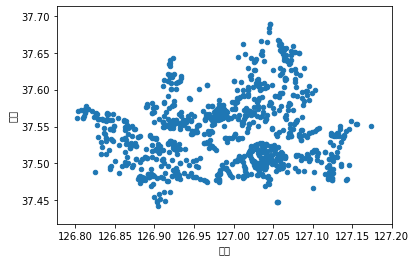

In [15]:
df_cafe[['위도','경도']].plot.scatter(x='경도',y='위도')

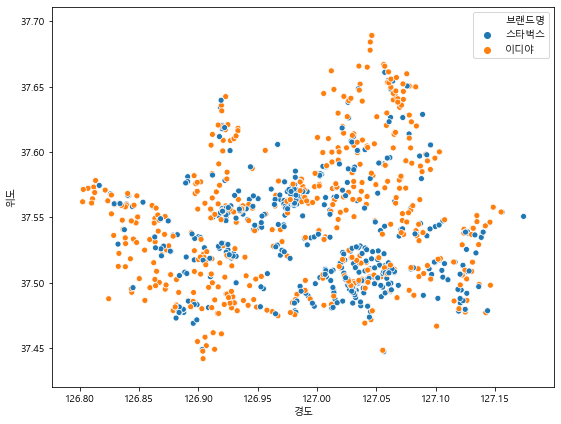

In [18]:
# seaborn의 scatterplot으로 hue에 브랜드명을 지정해서 시각화
plt.figure(figsize=(9,7))
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

In [19]:
df_cafe.pivot_table(columns='시군구명')

시군구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
건물본번지,3.473759e+02,6.631481e+02,2.627059e+02,1.843968e+02,8.408438e+02,2.890000e+02,1.616667e+02,1.924167e+02,4.443488e+02,4.724000e+02,...,1.528750e+02,1.324865e+02,2.064909e+02,2.193704e+02,1.228421e+02,1.343226e+02,2.896129e+02,9.248077e+01,8.211250e+01,3.921765e+02
경도,1.270457e+02,1.271354e+02,1.270229e+02,1.268379e+02,1.269356e+02,1.270833e+02,1.268775e+02,1.268922e+02,1.270672e+02,1.270405e+02,...,1.270372e+02,1.270263e+02,1.271142e+02,1.268620e+02,1.269139e+02,1.269825e+02,1.269204e+02,1.269872e+02,1.269866e+02,1.270873e+02
구우편번호,1.353792e+05,1.342417e+05,1.423483e+05,1.575091e+05,1.515842e+05,1.435887e+05,1.524867e+05,1.536880e+05,1.394601e+05,1.321886e+05,...,1.335685e+05,1.364117e+05,1.385537e+05,1.583562e+05,1.506122e+05,1.406206e+05,1.226124e+05,1.104266e+05,1.005626e+05,1.313025e+05
대지구분코드,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.032258e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
도로명코드,1.168033e+11,1.174028e+11,1.130531e+11,1.150032e+11,1.162028e+11,1.121530e+11,1.153036e+11,1.154531e+11,1.135034e+11,1.132033e+11,...,1.120035e+11,1.129035e+11,1.171030e+11,1.147031e+11,1.156032e+11,1.117031e+11,1.138031e+11,1.111034e+11,1.114034e+11,1.126031e+11
법정동코드,1.168011e+09,1.174011e+09,1.130510e+09,1.150010e+09,1.162010e+09,1.121510e+09,1.153010e+09,1.154510e+09,1.135010e+09,1.132011e+09,...,1.120011e+09,1.129013e+09,1.171011e+09,1.147010e+09,1.156011e+09,1.117012e+09,1.138011e+09,1.111015e+09,1.114013e+09,1.126010e+09
상가업소번호,1.920802e+07,2.005656e+07,1.822059e+07,1.705090e+07,1.921120e+07,2.030183e+07,1.895545e+07,1.882462e+07,1.804290e+07,1.893736e+07,...,1.910079e+07,2.029648e+07,1.833240e+07,1.926149e+07,1.846241e+07,1.757484e+07,1.881124e+07,1.987119e+07,1.926305e+07,1.934846e+07
시군구코드,1.168000e+04,1.174000e+04,1.130500e+04,1.150000e+04,1.162000e+04,1.121500e+04,1.153000e+04,1.154500e+04,1.135000e+04,1.132000e+04,...,1.120000e+04,1.129000e+04,1.171000e+04,1.147000e+04,1.156000e+04,1.117000e+04,1.138000e+04,1.111000e+04,1.114000e+04,1.126000e+04
시도코드,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,...,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
신우편번호,6.162301e+03,5.328370e+03,1.116118e+03,7.671746e+03,8.766875e+03,5.024125e+03,8.306970e+03,8.553625e+03,1.773395e+03,1.376100e+03,...,4.744958e+03,2.795054e+03,5.676564e+03,7.991889e+03,7.304246e+03,4.371806e+03,3.380839e+03,3.119750e+03,4.547012e+03,2.125176e+03


In [20]:
# 구별로 브랜드별 점포수 구하기
# groupby를 사용하면 구별로 그룹화 해서 점포수를 구할 수 있다.
df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count().to_frame().head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    49
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [21]:
df_cafe.pivot_table(index=['시군구명','브랜드명'],values='상호명',aggfunc='count').head(4)

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    49
강동구  스타벅스   13
     이디야    14

## 막대그래프로 시각화 하기

In [22]:
group = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count().reset_index()

In [25]:
group.columns

Index(['시군구명', '브랜드명', '상호명'], dtype='object')

In [26]:
group.columns = ['구','브랜드명','매장수']

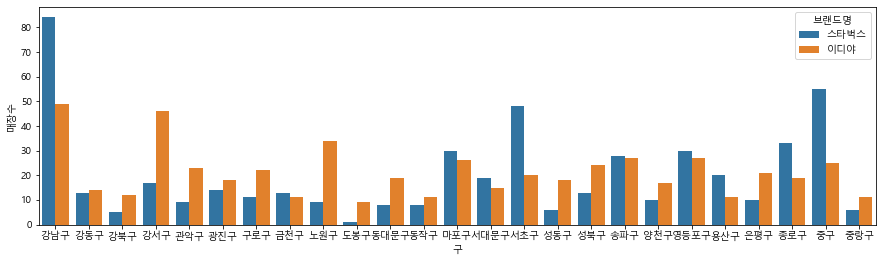

In [27]:
# seaborn의 barplot을 활용해 구별 매장수를 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=group, x='구', y='매장수', hue='브랜드명')

## 브랜드, 구별 매장수

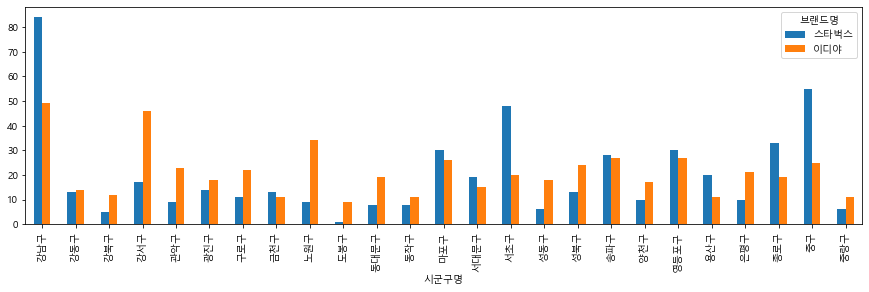

In [28]:
df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count().unstack().plot.bar(figsize=(15,4))

In [29]:
# pivot_table을 이용해서 구별 스타벅스, 이디야 매장수를 구합니다.
df_cafe.pivot_table(index='시군구명', columns='브랜드명', values='상호명', aggfunc='count')

브랜드명,스타벅스,이디야
시군구명,,
강남구,84,49
강동구,13,14
강북구,5,12
강서구,17,46
관악구,9,23
광진구,14,18
구로구,11,22
금천구,13,11
노원구,9,34


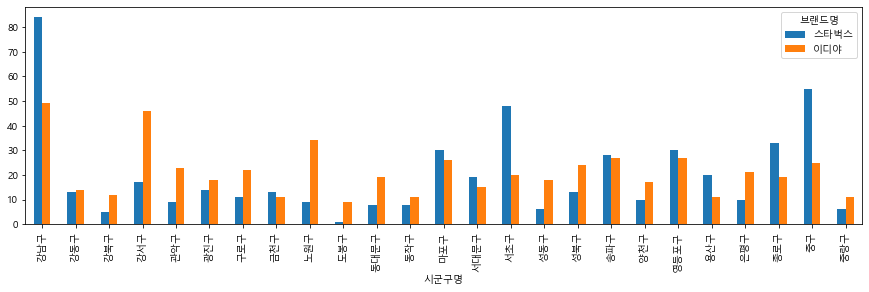

In [31]:
# 판다스의 장점 중 하나는 위에서처럼 구한 pivot_table을 시각화 해보기 쉽다는 점이다.
# pivot_table로 구한 결과를 plot.bar()를 통해 시각화하기
df_cafe.pivot_table(index='시군구명', columns='브랜드명', values='상호명', aggfunc='count').plot.bar(figsize=(15,4))

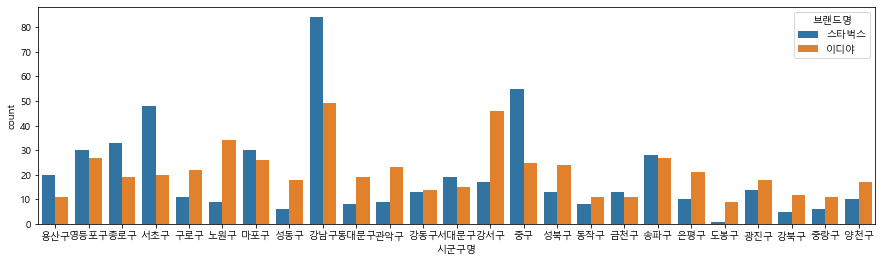

In [32]:
# Pandas 로 시각화를 하는 방법도 있지만 seaborn의 countplot을 사용하면 해당 컬럼의 수를 계산해서 시각화를 해준다.
# hue 옵션을 사용하게 되면 값에 따라 다른 색상으로 그리게 된다.
# hue 옵션을 사용할 때는 2~3개 정도의 카테고리 형태의 데이터를 사용하는 것이 적합하다.
# 여기에서는 브랜드명에 따라 다른 색상으로 표시할 수 있도록 한다.
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')

## Folium으로 지도 활용하기

In [33]:
import folium

In [34]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구한다.
lat = df_cafe['위도'].mean()
long = df_cafe['경도'].mean()
lat, long

(37.54330084622672, 126.9887587939228)

In [35]:
df_cafe.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도,상호명_소문자,브랜드명
1219,19976038,스타벅스,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 용산구 이태원로,188,1117013000101270029009542,서울특별시 용산구 이태원로 188,140200,4406.0,126.994781,37.534303,스타벅스,스타벅스


In [42]:
map = folium.Map(location=[lat, long], zoom_start=11)
folium.Marker([37.534303, 126.994781], tooltip='서울특별시 용산구 이태원로 188').add_to(map)
map

In [43]:
map.save('index.html')

In [46]:
df_cafe.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도', '상호명_소문자', '브랜드명'],
      dtype='object')

In [48]:
map = folium.Map(location=[lat,long], zoom_start=11)

for n in df_cafe.index:
    tooltip = f"{df_cafe.loc[n,'상호명']} : {df_cafe.loc[n,'도로명주소']}"
    lat = df_cafe.loc[n, '위도']
    long = df_cafe.loc[n, '경도']
    icon_color = 'green'
    
    if df_cafe.loc[n, '브랜드명'] == '이디야':
        icon_color = 'blue'
    
    folium.CircleMarker([lat, long],
                       radius = 3,
                       color = icon_color,
                       tooltip = tooltip
                       ).add_to(map)

map

## choropleth 그리기

In [49]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일이다.
# 이 파일을 불러와 구별 스타벅스와 이디야의 매장수를 표현해보자
geo_path = 'data/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding='utf-8'))
geo_json["features"][0]['properties']['name']

'강동구'

In [50]:
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

## 스타벅스 매장 분포

In [51]:
df_star = group[group['브랜드명']=='스타벅스'].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,9


In [53]:
map = folium.Map(location=[lat,long],zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구','매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(map)

map

## 이디야 매장분포

In [54]:
df_ediya = group[group['브랜드명']=='이디야'].copy()
df_ediya

,구,브랜드명,매장수
1,강남구,이디야,49
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,23
11,광진구,이디야,18
13,구로구,이디야,22
15,금천구,이디야,11
17,노원구,이디야,34
19,도봉구,이디야,9


In [55]:
map = folium.Map(location=[lat,long],zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구','매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(map)

map

In [56]:
# 위도, 경도 평균
map = folium.Map(location=[df_cafe['위도'].mean(), df_cafe['경도'].mean()], 
                 zoom_start=11)
map

## 매장수 크기 비교

In [60]:
df_cafe_brand = group.pivot(index='구', columns='브랜드명')
df_cafe_brand.columns = ['스타벅스','이디야']
df_cafe_brand['매장수비교'] = df_cafe_brand['스타벅스'] > df_cafe_brand['이디야']
df_cafe_brand.head(2)

,스타벅스,이디야,매장수비교
구,,,
강남구,84,49,True
강동구,13,14,False


In [61]:
df_cafe_brand['매장수비교'] = df_cafe_brand['매장수비교'].astype(int)
df_cafe_brand.head()

,스타벅스,이디야,매장수비교
구,,,
강남구,84,49,1
강동구,13,14,0
강북구,5,12,0
강서구,17,46,0
관악구,9,23,0


In [62]:
# 구를 컬럼명으로 사용하기 위해 reset_index
df_cafe_vs = df_cafe_brand.reset_index()
df_cafe_vs.head(2)

,구,스타벅스,이디야,매장수비교
0,강남구,84,49,1
1,강동구,13,14,0


In [64]:
map = folium.Map(location=[lat,long],zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_cafe_vs,
    columns=['구','매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 이디야 매장수 비교'
).add_to(map)

for n in df_cafe.index:
    tooltip = f"{df_cafe.loc[n,'상호명']} : {df_cafe.loc[n,'도로명주소']}"
    lat = df_cafe.loc[n, '위도']
    long = df_cafe.loc[n, '경도']
    icon_color = 'green'
    
    if df_cafe.loc[n,'브랜드명'] == '이디야':
        icon_color = 'blue'
        
    folium.CircleMarker([lat,long],
                    radius = 2,
                    color = icon_color,
                    tooltip=tooltip
                   ).add_to(map)

map